# <h1 style="color:black; font-family: Arial;"> Text mining: Question_2.</h1>

<h2 style="color:blue; font-family: Arial;"> Extract reviews of any product from ecommerce website like amazon</h2>

_<h3 style="color:black; font-family: Arial;"> 1)We will use iphone 14 reviews in these assignment </h3>_
_<h3 style="color:black; font-family: Arial;"> 2)We will use beautiful soup for extracting reviews </h3>_

beautiful soup is an python library which is used for web scraping & allows us to parse and extract data.

In [23]:
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

# Importing requests to extract content from a url
import requests

# Importing Beautifulsoup...which is used for scrapping any content from web
from bs4 import BeautifulSoup as bs

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# creating empty reviews list
iphone14_reviews = []

# Extracting reviews from Amazon website
for i in range(1, 16):
    ip = []

    url = 'https://www.amazon.in/Apple-iPhone-14-256GB-Blue/product-reviews/B0BDJ1B1CS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews ' 
    response = requests.get(url)
    soup = bs(response.content, "html.parser")
    reviews = soup.findAll("span", attrs={"class": "a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone14_reviews = iphone14_reviews + ip

# writng reviews in a text file
with open("iphone14.txt", "w", encoding='utf8') as output:
    output.write(str(iphone14_reviews))


In [9]:
iphone14_reviews

["\nIt is just a review from my side so that its good for you to know before buying rather than regretting later.Positives:* Showoff* Camera* Sound* Security (they say, bt that blocks so many accessibility options for me)* So many awesome features as all iphone users say (which probably I will use once in a lifetime)Negatives for me (You may like it):1. No shortcut to change between vibration and no vibration frequently.2. No end call button on the lock screen.3. Call list is nonsense. It shows phone, whatsap and all other calls in same list.4. Go to a specific contact in call history n you can see only history of one day. Total length of call history is 100. Most probably you will not be able to find call history of previous week for a specific contact.5. Need of Itunes to copy music from PC to phone.6. No file manager like android where we can see and access complete folder structure.7. No silent and vibrate mode notification on screen.8. Need to buy separate adapter n earphones afte

In [10]:
 # Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone14_reviews)


In [11]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)


In [13]:
# words that contained in  reviews
ip_reviews_words = ip_rev_string.split(" ")
print(ip_reviews_words)


['', 'it', 'is', 'just', 'a', 'review', 'from', 'my', 'side', 'so', 'that', 'its', 'good', 'for', 'you', 'to', 'know', 'before', 'buying', 'rather', 'than', 'regretting', 'later', 'positives', 'showoff', 'camera', 'sound', 'security', 'they', 'say', 'bt', 'that', 'blocks', 'so', 'many', 'accessibility', 'options', 'for', 'me', 'so', 'many', 'awesome', 'features', 'as', 'all', 'iphone', 'users', 'say', 'which', 'probably', 'i', 'will', 'use', 'once', 'in', 'a', 'lifetime', 'negatives', 'for', 'me', 'you', 'may', 'like', 'it', 'no', 'shortcut', 'to', 'change', 'between', 'vibration', 'and', 'no', 'vibration', 'frequently', 'no', 'end', 'call', 'button', 'on', 'the', 'lock', 'screen', 'call', 'list', 'is', 'nonsense', 'it', 'shows', 'phone', 'whatsap', 'and', 'all', 'other', 'calls', 'in', 'same', 'list', 'go', 'to', 'a', 'specific', 'contact', 'in', 'call', 'history', 'n', 'you', 'can', 'see', 'only', 'history', 'of', 'one', 'day', 'total', 'length', 'of', 'call', 'history', 'is', 'most'

In [19]:
nlp=spacy.load('en_core_web_md')
one_block=iphone14_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [20]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [21]:
# Joinining all the reviews into single paragraph 
ip_rev_para = " ".join(ip_reviews_words)

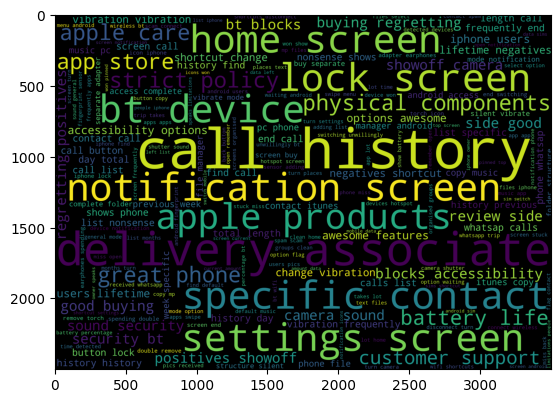

In [25]:
wordcloud_ip = WordCloud(
                      background_color='black',
    width=3500,height=2500
                     ).generate(ip_rev_para)

plt.imshow(wordcloud_ip)

In [26]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")


In [27]:
# Choosing the only words which are present in positive words
ip_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

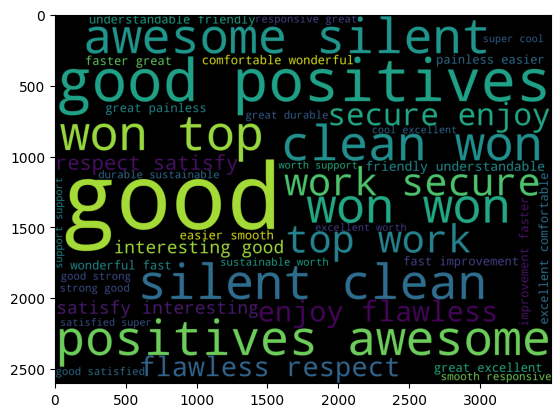

In [29]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=3500,
                      height=2600
                     ).generate(ip_pos)

plt.imshow(wordcloud_pos)

In [30]:
# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

In [31]:
# Choosing the only words which are present in negwords
ip_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

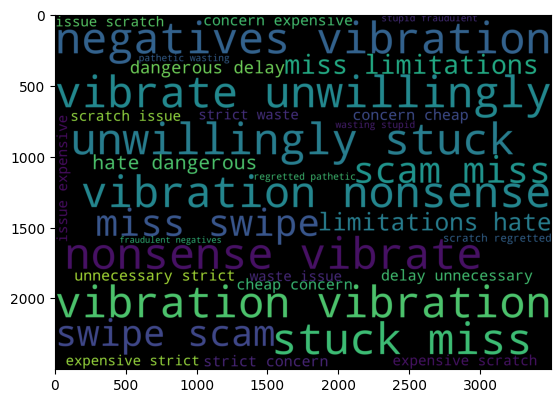

In [32]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3500,
                      height=2500
                     ).generate(ip_neg)

plt.imshow(wordcloud_neg)